In [7]:
import pandas as pd  # 导入各类模块
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import 统计学习.brfss as brfss
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
np.random.random(size=5)  # size表示生成随机数的个数

array([0.89401513, 0.48788606, 0.45711958, 0.64662146, 0.21672543])

In [9]:
np.random.randint(1, 10, size=5)  # 生成5个1到9之间的随机整数

array([4, 9, 8, 4, 5])

In [10]:
np.random.seed(123)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


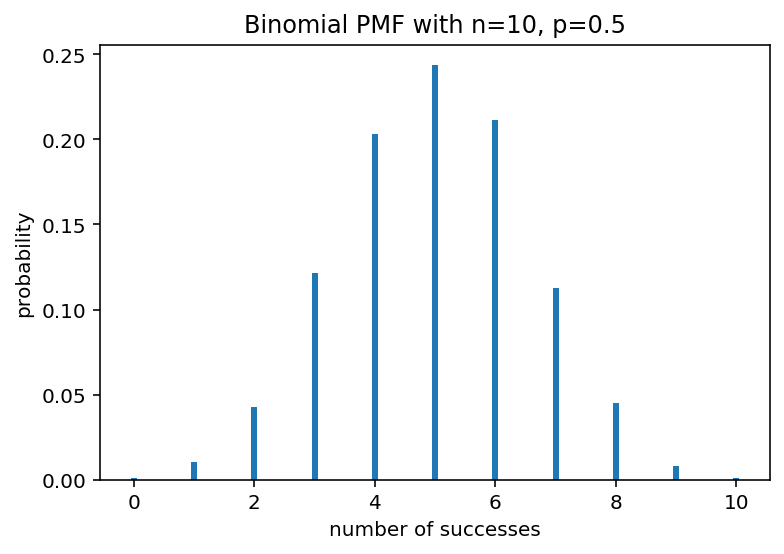

In [11]:
def plot_binomial(n,p):
    '''绘制二项分布的概率质量函数'''
    sample = np.random.binomial(n,p,size=10000)  # 产生10000个符合二项分布的随机数
    bins = np.arange(n+2)
    plt.hist(sample, bins=bins, align='left', normed=True, rwidth=0.1)  # 绘制直方图
    #设置标题和坐标
    plt.title('Binomial PMF with n={}, p={}'.format(n,p))
    plt.xlabel('number of successes')
    plt.ylabel('probability')


plot_binomial(10, 0.5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


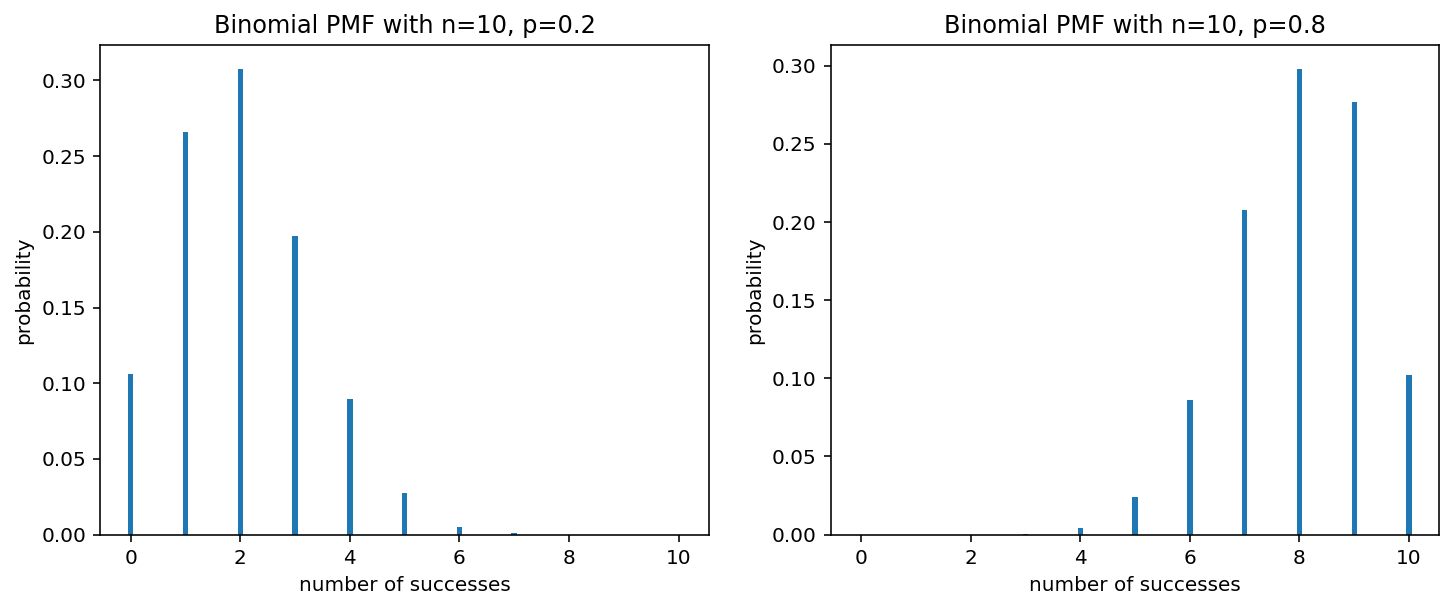

In [12]:
fig = plt.figure(figsize=(12,4.5)) #设置画布大小
p1 = fig.add_subplot(121)  # 添加第一个子图
plot_binomial(10, 0.2)
p2 = fig.add_subplot(122)  # 添加第二个子图
plot_binomial(10, 0.8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


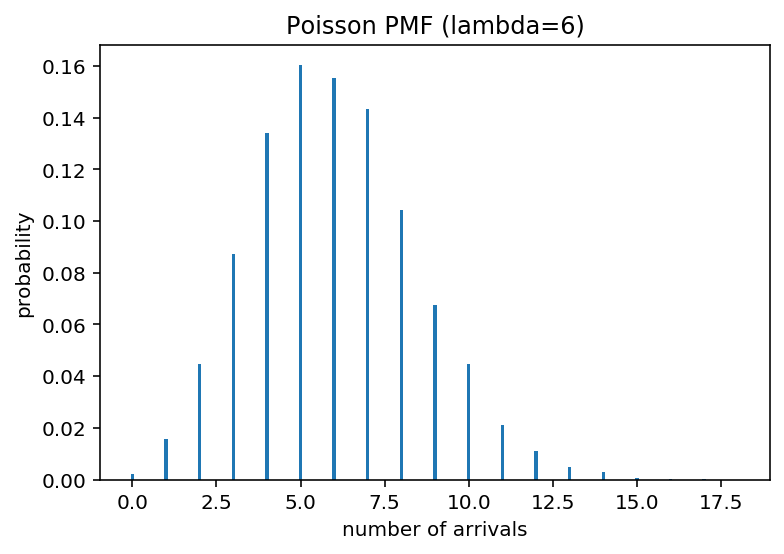

In [13]:
lamb = 6
sample = np.random.poisson(lamb, size=10000)  # 生成10000个符合泊松分布的随机数
bins = np.arange(20)
plt.hist(sample, bins=bins, align='left', rwidth=0.1, normed=True) # 绘制直方图
# 设置标题和坐标轴
plt.title('Poisson PMF (lambda=6)')
plt.xlabel('number of arrivals')
plt.ylabel('probability')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


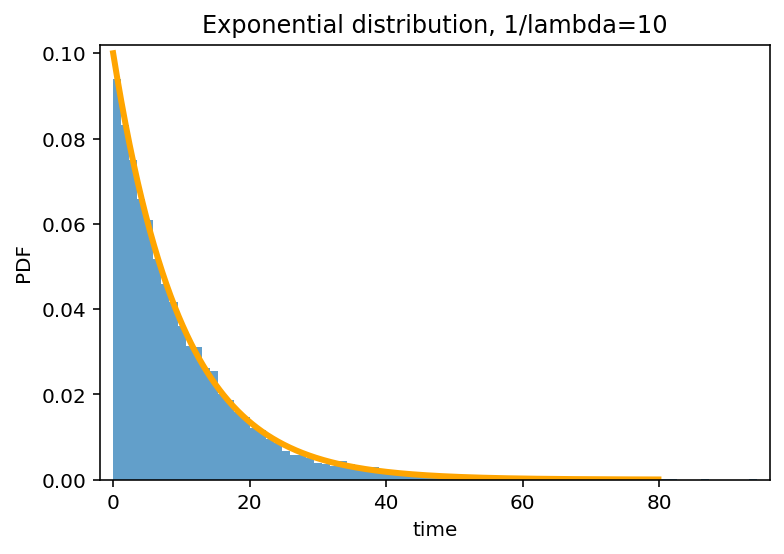

In [14]:
tau = 10
sample = np.random.exponential(tau, size=10000)  # 产生10000个满足指数分布的随机数
plt.hist(sample, bins=80, alpha=0.7, normed=True) #绘制直方图
plt.margins(0.02)

# 根据公式绘制指数分布的概率密度函数
lam = 1 / tau
x = np.arange(0,80,0.1)
y = lam * np.exp(- lam * x)
plt.plot(x,y,color='orange', lw=3)

#设置标题和坐标轴
plt.title('Exponential distribution, 1/lambda=10')
plt.xlabel('time')
plt.ylabel('PDF')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


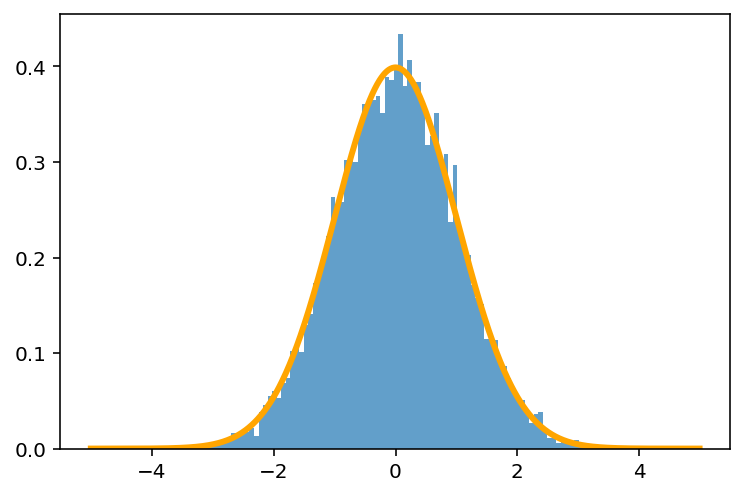

In [15]:
def norm_pdf(x,mu,sigma):
    '''正态分布概率密度函数'''
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

mu = 0    # 均值为0
sigma = 1 # 标准差为1

# 用统计模拟绘制正态分布的直方图
sample = np.random.normal(mu, sigma, size=10000)
plt. hist(sample, bins=100, alpha=0.7, normed=True)

# 根据正态分布的公式绘制PDF曲线
x = np.arange(-5, 5, 0.01)
y = norm_pdf(x, mu, sigma)
plt.plot(x,y, color='orange', lw=3)
plt.show()

In [16]:
# 导入BRFSS数据
import 统计学习.brfss as brfss
df = brfss.ReadBrfss()
height = df.height.dropna()
weight = df.weight.dropna()

In [17]:
def plot_pdf_cdf(data, xbins, xrange, xlabel):
    '''绘制概率密度函数PDF和累积分布函数CDF'''

    fig = plt.figure(figsize=(16,5)) # 设置画布尺寸

    p1 = fig.add_subplot(121)  # 添加第一个子图
    # 绘制正态分布PDF曲线
    std = data.std()
    mean = data.mean()
    x = np.arange(xrange[0], xrange[1], (xrange[1]-xrange[0])/100)
    y = norm_pdf(x, mean, std)
    plt.plot(x,y, label='normal distribution')
    # 绘制数据的直方图
    plt.hist(data, bins=xbins, range=xrange, rwidth=0.9,
             alpha=0.5, normed=True, label='observables')
    # 图片设置
    plt.legend()
    plt.xlabel(xlabel)
    plt.title(xlabel +' PDF')

    p2 = fig.add_subplot(122)  #添加第二个子图
    # 绘制正态分布CDF曲线
    sample = np.random.normal(mean, std, size=10000)
    plt.hist(sample, cumulative=True, bins=1000, range=xrange,
             normed=True, histtype='step', lw=2, label='normal distribution')
    # 绘制数据的CDF曲线
    plt.hist(data, cumulative=True, bins=1000, range=xrange,
             normed=True, histtype='step', lw=2, label='observables')
    #图片设置
    plt.legend(loc='upper left')
    plt.xlabel(xlabel)
    plt.title( xlabel + ' CDF')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


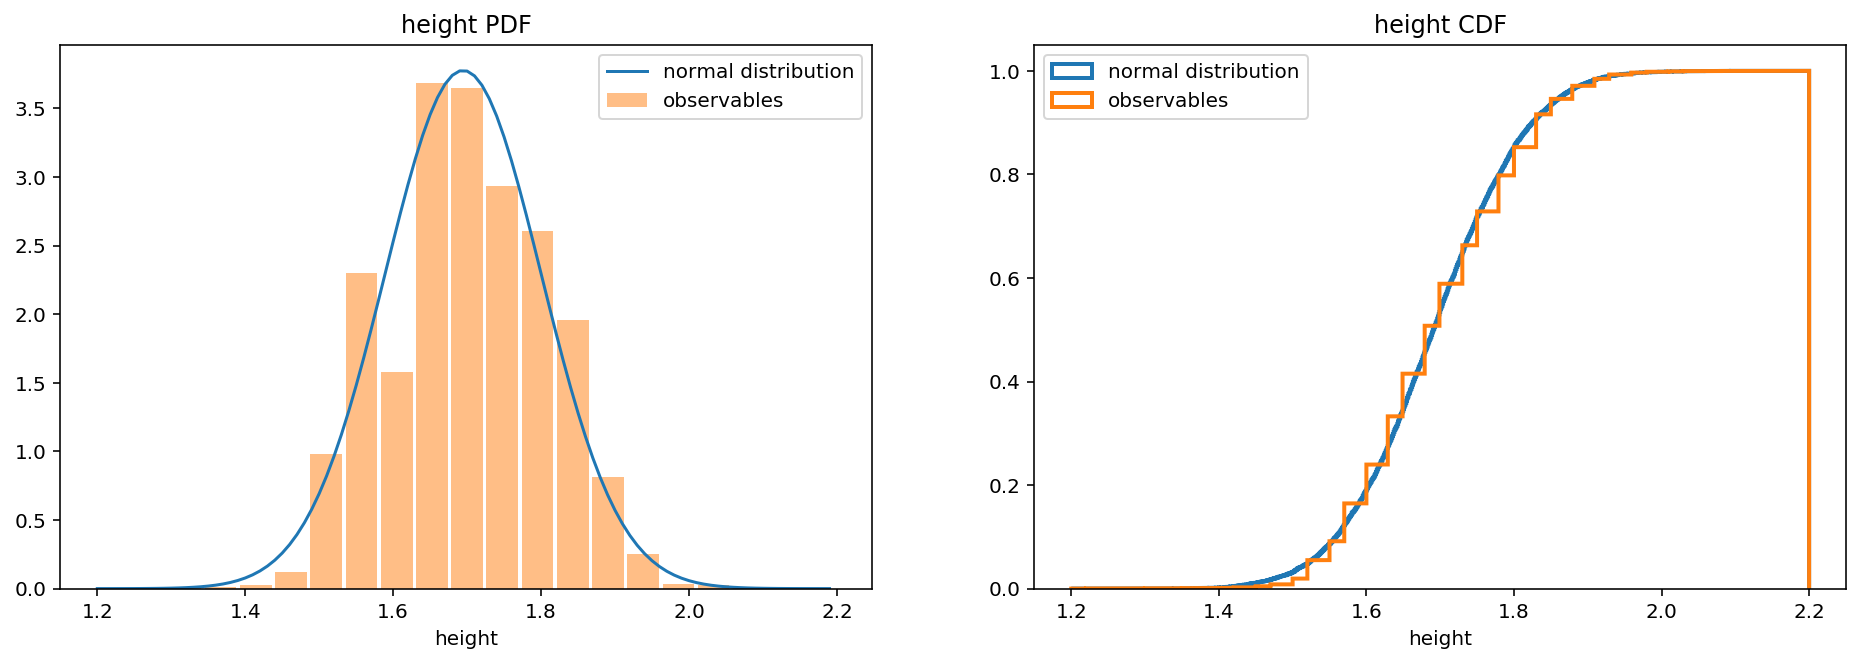

In [18]:
plot_pdf_cdf(data=height, xbins=21, xrange=(1.2, 2.2), xlabel='height')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


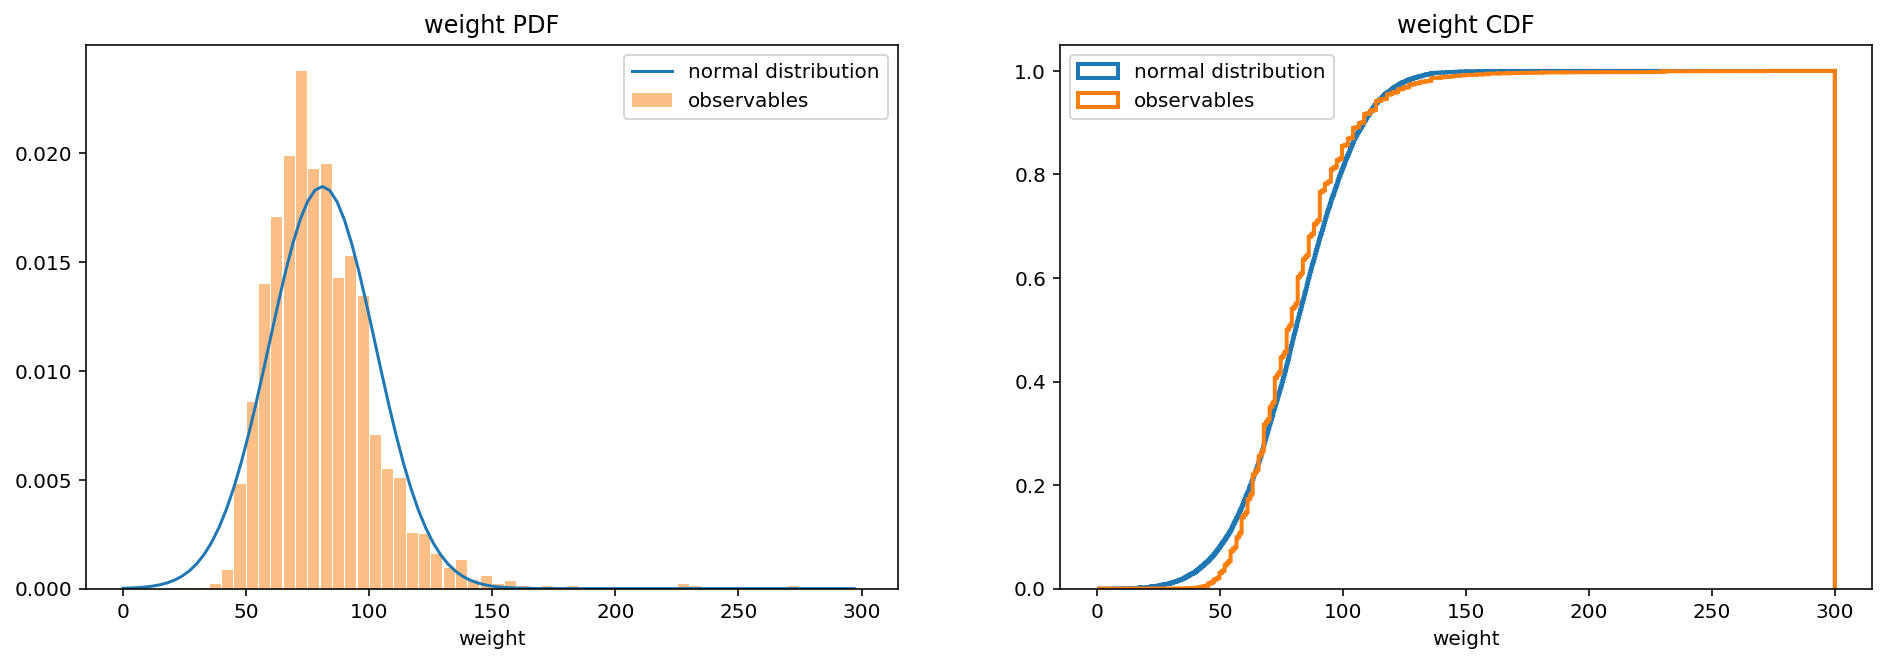

In [19]:
plot_pdf_cdf(data=weight, xbins=60, xrange=(0,300), xlabel='weight')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


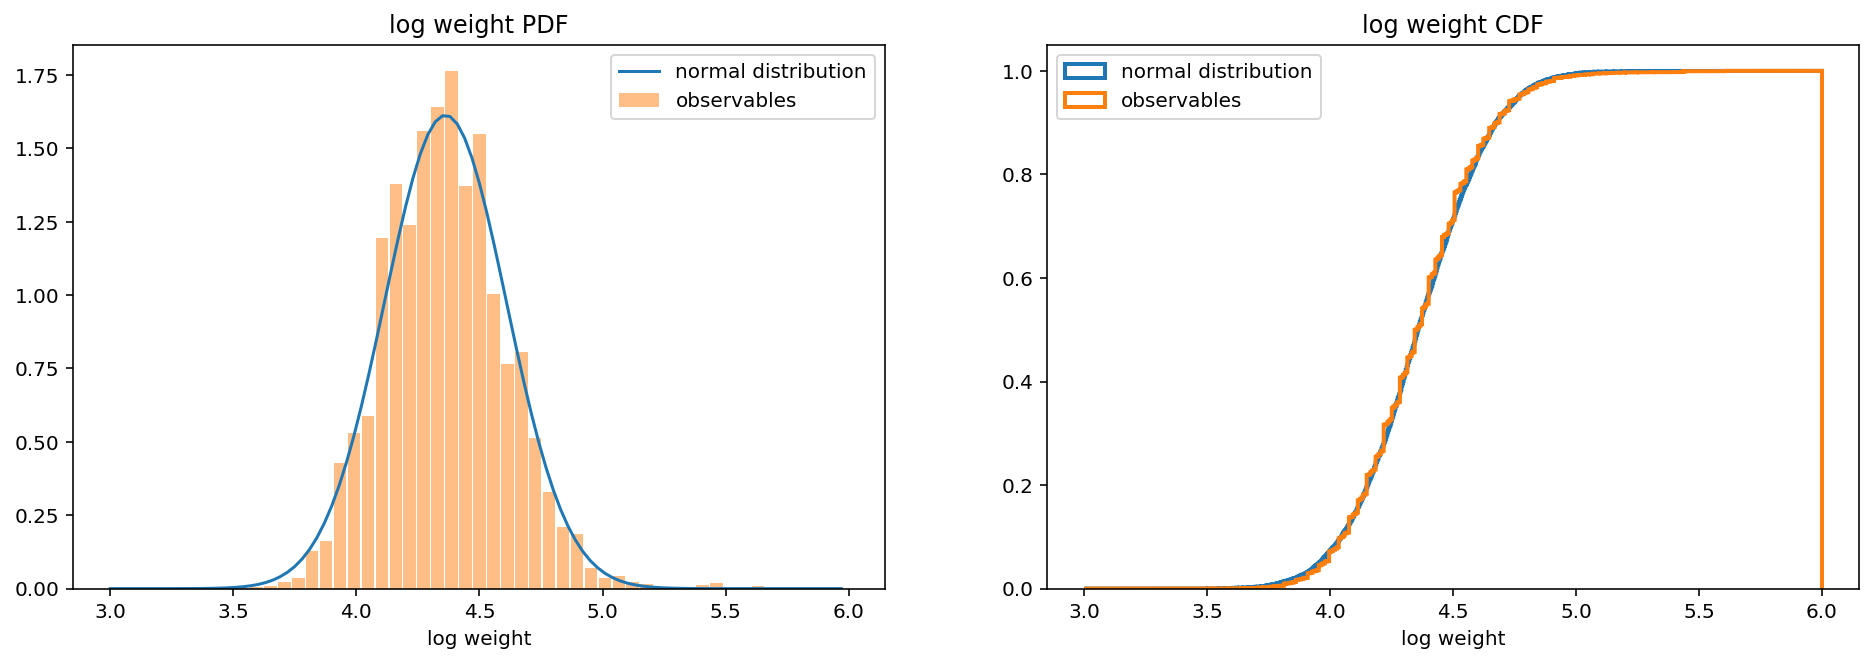

In [20]:
log_weight = np.log(weight)
plot_pdf_cdf(data=log_weight, xbins=53, xrange=(3,6), xlabel='log weight')